In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

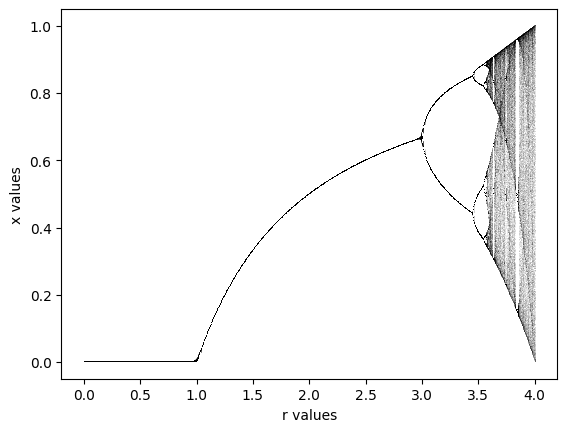

0.859 2.992865731462926 3.452370741482966
4.643835616438357
Feigenbaum-like Ratio: 4.643836
0.5404236603773787


In [2]:
def log_map(x,r):
    return r*x*(1-x)
def detect_periodicity(r, x0=0.5, iterations=1000, burn_in=900):
    """Detects whether an r-value exhibits period-2 or period-4 behavior."""
    x = np.zeros(iterations)
    x[0] = x0
    for i in range(1, iterations):
        x[i] = log_map(x[i-1], r)

    # Check periodicity after burn-in
    x_check = np.round(x[burn_in:], decimals=6)  # Round to reduce floating point errors
    # Check for period-2: x[n] ≈ x[n+1]
    period_1=np.allclose(x_check[:-1], x_check[1:],atol=1e-5)

    # Check for period-2: x[n] ≈ x[n+2]
    period_2 = np.allclose(x_check[:-2], x_check[2:], atol=1e-5)

    # Check for period-4: x[n] ≈ x[n+4]
    period_4 = np.allclose(x_check[:-4], x_check[4:], atol=1e-5)
    if period_1:
        return 1
    elif period_2:
        return 2
    elif period_4:
        return 4
    return 0  # Not periodic (likely chaotic)
rval= np.linspace(0,4.0,1000)

#1000 is the number of r steps
num=1000
#x=np.ones(1000)
x = np.random.rand(len(rval))  # Initialize x with random values in (0,1)
# Set the number of iterations to discard as "burn-in" 
burn_in = 100 
#loop over the range of r values and iterate the function map
for i in range(num-1):
    x=log_map(x, rval)
    if i > burn_in: # Just plotting enough to see the pattern so stopping when loop is at 101
        plt.plot(rval, x, ',k', alpha=0.05) #plotting all points r and x until i equals 101
        if (x[i]==x[i+1]):
            print("here")
        #print(rval[i] +" is equal to " + x[i] + x[i+1])

# Scan r values for periodicity detection
r_values = np.linspace(0.859, 4.0, 500)
periodic_r_1=[]
periodic_r_2 = []
periodic_r_4 = []

for r in r_values:
    period = detect_periodicity(r)
    if period ==1:
        periodic_r_1.append(r)
    elif period == 2:
        periodic_r_2.append(r)
    elif period == 4:
        periodic_r_4.append(r)
plt.xlabel('r values')
plt.ylabel('x values')
#plt.xlim(0,3)
plt.show()
print(periodic_r_1[0],periodic_r_2[0],periodic_r_4[0])
f=(periodic_r_2[0]-periodic_r_1[0])/(periodic_r_4[0]-periodic_r_2[0])
print(f)
# Calculate Feigenbaum constant
if len(periodic_r_1) > 0 and len(periodic_r_2) > 0 and len(periodic_r_4) > 0:
    f = (periodic_r_2[0] - periodic_r_1[0]) / (periodic_r_4[0] - periodic_r_2[0])
    print(f"Feigenbaum-like Ratio: {f:.6f}")
else:
    print("Not enough periodic points detected.")
f_theor=4.669
f_perc_diff=(abs(f_theor-f)/(f_theor+f))*200
print(f_perc_diff)

Above I found r1, r2, and r4. Visually I can see the first periodicity point is when r=2 approximately.

In [ ]:
def ode_system2(y, t):
    """System of first-order ODEs."""
    y1, y2, y3 = y
    dy1_dt = y2
    dy2_dt = y3
    dy3_dt = -2.017 * y3 - y2 + abs(y1) - 1
    return [dy1_dt, dy2_dt, dy3_dt]

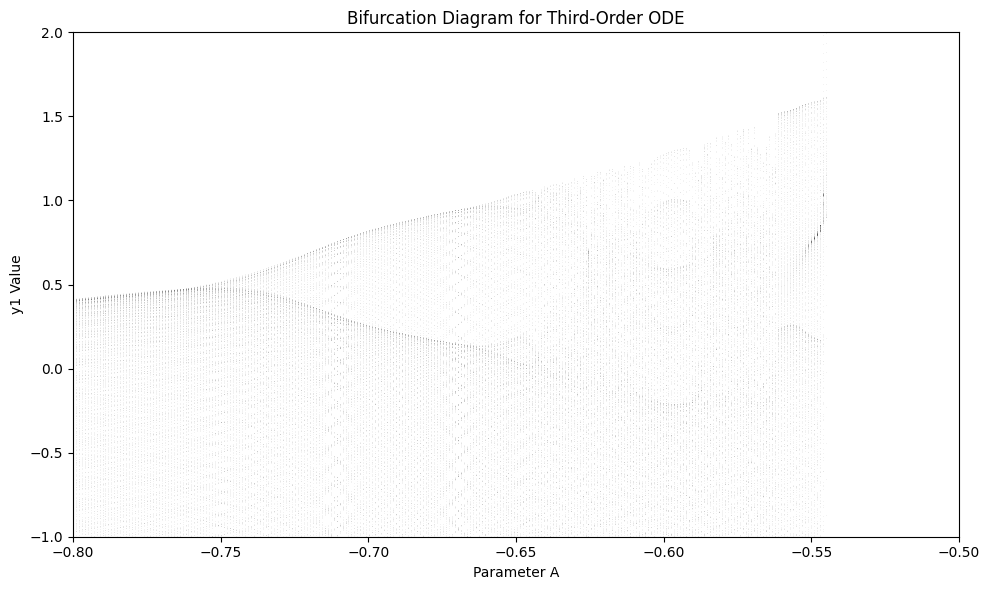

In [27]:
A_range = np.linspace(-0.8, -0.5, 300)
t_span = np.linspace(0, 100, 1000)  # time points for integration
initial_conditions = [0, 0, 0]
transient_cut = 50  # ignore first 50 time units as transient

# Store bifurcation points
bifurcation_points = []

# Numerical integration and tracking
for A in A_range:
    # Solve the ODE using odeint
    sol = odeint(ode_system, initial_conditions, t_span, args=(A,))
    
    # Collect y1 values after transient period
    y1_values = sol[t_span >= transient_cut, 0]
    
    # Store points for this A value
    for y1 in y1_values:
        #if(A<-0.75 and y1<0.25):
        #    bifurcation_points.append((A, y1))
            #print("here" , A,y1)
        #else:
        bifurcation_points.append((A, y1))

# Convert to numpy array for plotting
bifurcation_points = np.array(bifurcation_points)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(bifurcation_points[:, 0], bifurcation_points[:, 1], 
         ',k', alpha=0.05)
plt.title('Bifurcation Diagram for Third-Order ODE')
plt.xlabel('Parameter A')
plt.ylabel('y1 Value')
plt.xlim(-0.8, -0.5)
plt.ylim(-1, 2)
plt.tight_layout()
plt.show()

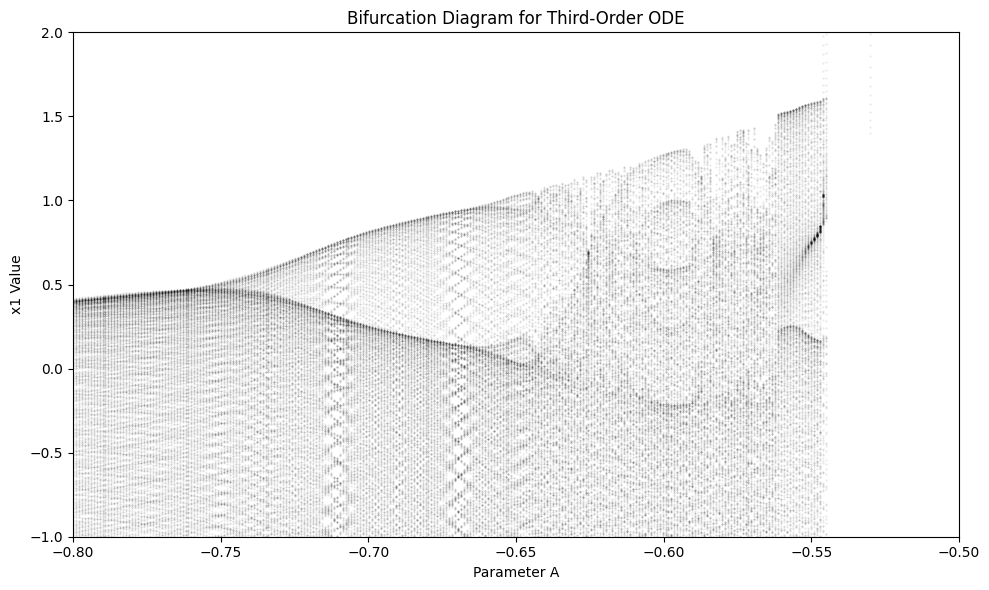

In [28]:
# Define parameter range and integration time
A_range = np.linspace(-0.8, -0.5, 300)
t_span = np.linspace(0, 100, 1000)  # Time points for integration
initial_conditions = [0, 0, 0]
transient_cut = 40  # Ignore first 50 time units as transient

# Find the index where transient_cut happens
transient_idx = np.searchsorted(t_span, transient_cut)

# Store bifurcation points
bifurcation_points = []

# Numerical integration and tracking
for A in A_range:
    sol = odeint(ode_system, initial_conditions, t_span, args=(A,))
    
    # Collect y1 values after transient period
    x1_values = sol[transient_idx:, 0]  # Ignore transient

    # Store points efficiently
    bifurcation_points.extend([(A, x1) for x1 in x1_values])

# Convert to numpy array for plotting
bifurcation_points = np.array(bifurcation_points)

# Create bifurcation plot
plt.figure(figsize=(10, 6))
plt.scatter(bifurcation_points[:, 0], bifurcation_points[:, 1], 
            s=0.2, color='black', alpha=0.1)  # Better visualization
plt.title('Bifurcation Diagram for Third-Order ODE')
plt.xlabel('Parameter A')
plt.ylabel('x1 Value')
plt.xlim(-0.8, -0.5)
plt.ylim(-1, 2)
plt.tight_layout()
plt.show()
#rounding to discret data pts

## # Plot x (y1)
plt.subplot(3, 1, 1)
plt.plot(t, solution[:, 0], label='x')
plt.title(f'ODE Solution (A = {A})')
plt.ylabel('x')
plt.legend()

# Plot dx/dt (y2)
plt.subplot(3, 1, 2)
plt.plot(t, solution[:, 1], label='dx/dt', color='red')
plt.ylabel('dx/dt')
plt.legend()

# Plot d²x/dt² (y3)
plt.subplot(3, 1, 3)
plt.plot(t, solution[:, 2], label='d²x/dt²', color='green')
plt.xlabel('Time')
plt.ylabel('d²x/dt²')
plt.legend()

plt.tight_layout()
plt.show()

# Print some basic statistics
print("Solution Statistics:")
print(f"x range: {solution[:, 0].min()} to {solution[:, 0].max()}")
print(f"dx/dt range: {solution[:, 1].min()} to {solution[:, 1].max()}")
print(f"d²x/dt² range: {solution[:, 2].min()} to {solution[:, 2].max()}")

In [ ]:
A_range = np.linspace(-0.8, -0.5, 100)
t_span = np.linspace(0, 100, 100)
initial_conditions = [0, 0,0]

# Store bifurcation points
bifurcation_points = []

# Numerical integration
for A in A_range:
    # Solve the ODE
    sol = odeint(ode_system, initial_conditions, t_span, args=(A,))
    
    # Store x values
    for x in sol[:, 0]:
        bifurcation_points.append((A, x))

# Convert to numpy array for plotting
bifurcation_points = np.array(bifurcation_points)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(bifurcation_points[:, 0], bifurcation_points[:, 1], 
         ',k', alpha=0.1, markersize=0.1)
plt.title('Bifurcation Diagram of Chaotic Circuit')
plt.xlabel('Parameter A')
plt.ylabel('x')
#plt.xlim(-0.8, -0.5)
plt.ylim(-1, 2)
plt.tight_layout()
plt.show()

In [ ]:
A=-0.67
# Solve ODE system
solution1 = odeint(ode_system, initial_conditions, t, args=(A,))
# Plot dx/dt (y2)
#plt.subplot(3, 1, 2)
plt.plot(solution1[:,0], solution1[:, 1], label='dx/dt', color='red')
plt.xlabel('x')
plt.ylabel('dx/dt')
plt.legend()

# Plot d²x/dt² (y3)
#plt.subplot(3, 1, 3)


In [ ]:
plt.plot(solution[:,1], solution[:, 2], label='d²x/dt²', color='green')
plt.xlabel('dx/dt')
plt.ylabel('d²x/dt²')
plt.legend()

In [ ]:
A=-0.55
solution2 = odeint(ode_system, initial_conditions, t, args=(A,))
plt.plot(solution2[:,0], solution2[:, 1], label='dx/dt', color='red')
plt.xlabel('x')
plt.ylabel('dx/dt')
plt.legend()



In [ ]:
# Plot d²x/dt² (y3)
plt.subplot(3, 1, 3)
plt.plot(solution2[:,1], solution2[:, 2], label='d²x/dt²', color='green')
plt.xlabel('dx/dt')
plt.ylabel('d²x/dt²')
plt.legend()